In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import graphviz

sns.set()

In [5]:
def gen_data_cloud(n):
    X = []
    y = []
    
    y_axis = np.linspace(-2, 2, n)
    x1 = np.linspace(-1.5, -0.5, n)
    x2 = np.linspace(0.5, 1.5, n)

    x1v, y1v = np.meshgrid(x1, y_axis)
    x2v, y2v = np.meshgrid(x2, y_axis)

    for i in range(n):
        for j in range(n):
            
            _x1 = x1v[j,i]
            _y1 = y1v[j,i]

            _x2 = x2v[j,i]
            _y2 = y2v[j,i]

            X.append( (_x1, _y1) )
            y.append([1, 0])
            
            X.append( (_x2, _y2) )
            y.append([0, 1])

    return np.array(X), np.array(y)

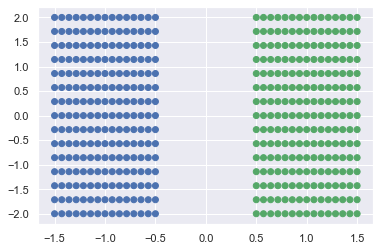

In [6]:
X, y = gen_data_cloud(15)

y_class = np.argmax(y, axis=1)
c = []

for i in y_class:
    if i == 0:
        c.append("b")
    else:
        c.append("g")


plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [30]:
X, y = gen_data_cloud(15)


weights_cloud_l0_1 = []
bias_cloud_l0_1 = []
acc_cloud_1 = []

for i in range(1):
    print("Treinando rede {}..".format(i))
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(
            1,
            activation="sigmoid"
        ),
        tf.keras.layers.Dense(
            2,
            activation="sigmoid"
        )
    ])

    model.compile(
        loss='mean_squared_error',
        metrics=["accuracy"]
    )

    hist = model.fit(X, y, epochs=60, batch_size=3, verbose=0)
    
    layers = model.layers
    
    print("X:", X[0])
    print("acurácia:", hist.history["accuracy"][-1])
    
    for layer in layers:
        print(layer.weights)
        print("----------")

Treinando rede 0..
X: [-1.5 -2. ]
acurácia: 1.0
[<tf.Variable 'dense_32/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 8.627509e+00],
       [-8.224548e-04]], dtype=float32)>, <tf.Variable 'dense_32/bias:0' shape=(1,) dtype=float32, numpy=array([-0.2854296], dtype=float32)>]
----------
[<tf.Variable 'dense_33/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-7.1365256,  7.6005187]], dtype=float32)>, <tf.Variable 'dense_33/bias:0' shape=(2,) dtype=float32, numpy=array([ 3.4052444, -3.638634 ], dtype=float32)>]
----------
